In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('bdp.csv')
data.head()

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72


In [2]:
data.isnull().sum()

Sl. No.               0
Pulse                 0
Systolic Pressure     0
Diastolic Pressure    0
dtype: int64

In [3]:
data.dropna(axis=1)

,Sl. No.,Pulse,Systolic Pressure,Diastolic Pressure
0,1,73,128,78
1,2,71,127,73
2,3,71,129,78
3,4,68,125,69
4,5,68,125,72
...,...,...,...,...
145,146,70,130,81
146,147,78,126,74
147,148,72,124,82
148,149,71,125,83


In [4]:
df=data.drop(['Sl. No.'],axis=1)
df.head()

,Pulse,Systolic Pressure,Diastolic Pressure
0,73,128,78
1,71,127,73
2,71,129,78
3,68,125,69
4,68,125,72


In [5]:
df.info

<bound method DataFrame.info of      Pulse  Systolic Pressure  Diastolic Pressure
0       73                128                  78
1       71                127                  73
2       71                129                  78
3       68                125                  69
4       68                125                  72
..     ...                ...                 ...
145     70                130                  81
146     78                126                  74
147     72                124                  82
148     71                125                  83
149     82                119                  86

[150 rows x 3 columns]>

In [6]:
df.describe()

,Pulse,Systolic Pressure,Diastolic Pressure
count,150.000000,150.000000,150.000000
mean,75.153333,124.406667,76.533333
std,5.994110,4.000162,5.288542
min,66.000000,109.000000,67.000000
25%,71.000000,122.000000,73.000000
50%,73.000000,125.000000,76.000000
75%,78.750000,127.000000,79.750000
max,93.000000,134.000000,92.000000


In [12]:
x=df.iloc[:,:1]  #pulse
y=df.iloc[:,-1]  #diastolic
z=df.iloc[:,-2]  #systolic

In [13]:
print(z)

0      128
1      127
2      129
3      125
4      125
      ... 
145    130
146    126
147    124
148    125
149    119
Name: Systolic Pressure, Length: 150, dtype: int64


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
l_train,l_test,r_train,r_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(l_train,r_train)

LinearRegression()

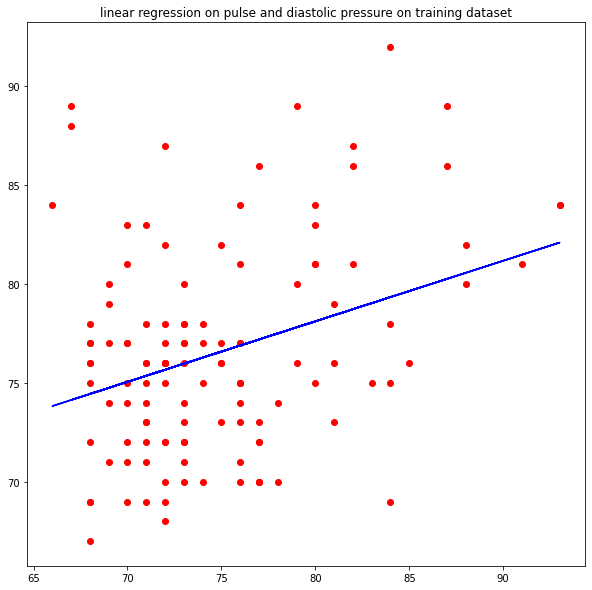

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(l_train,r_train,color='red')
plt.plot(l_train,lr.predict(l_train),color='blue')
plt.title('linear regression on pulse and diastolic pressure on training dataset')
plt.show()

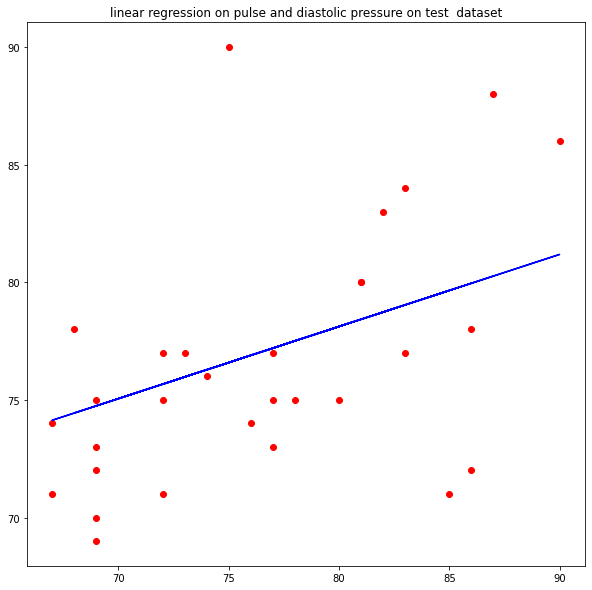

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(l_test,r_test,color='red')
plt.plot(l_test,lr.predict(l_test),color='blue')
plt.title('linear regression on pulse and diastolic pressure on test  dataset')
plt.show()

In [22]:
y1=df.iloc[:,1:3]
x1=df.iloc[:,:-2] 
y1.head()

,Systolic Pressure,Diastolic Pressure
0,128,78
1,127,73
2,129,78
3,125,69
4,125,72


In [23]:
x1.head()

,Pulse
0,73
1,71
2,71
3,68
4,68


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
pred=lr.predict(x_test)
pred

array([[124.13490992,  75.69254944],
       [123.95853355,  74.74518598],
       [124.54645478,  77.90306418],
       [123.95853355,  74.74518598],
       [123.95853355,  74.74518598],
       [124.13490992,  75.69254944],
       [124.6052469 ,  78.218852  ],
       [123.89974142,  74.42939816],
       [123.78215718,  73.79782251],
       [123.89974142,  74.42939816],
       [124.13490992,  75.69254944],
       [124.37007841,  76.95570072],
       [124.13490992,  75.69254944],
       [124.42887053,  77.27148854],
       [124.6052469 ,  78.218852  ],
       [124.01732567,  75.0609738 ],
       [124.07611779,  75.37676162],
       [124.13490992,  75.69254944],
       [124.66403903,  78.53463982],
       [125.36954451,  82.32409367],
       [124.13490992,  75.69254944],
       [123.89974142,  74.42939816],
       [124.42887053,  77.27148854],
       [125.19316814,  81.37673021],
       [124.01732567,  75.0609738 ],
       [123.89974142,  74.42939816],
       [123.8409493 ,  74.11361033],
 

In [38]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

3.8525300511393357

In [40]:
n=int(input())
x=[[n]]
p=lr.predict(x)
print("Prediced Value",p)

76
Prediced Value [[124.37007841  76.95570072]]
